# Data Warehouse Assignment: Layoffs Dataset
Visualisasi data *layoffs* dan analisis kebutuhan (requirements analysis) sesuai Tugas DW #6.
Dataset: `layoffs.csv` (2020‑2025)



## Analisis Kebutuhan (Requirements Analysis)

Berpedoman pada materi kuliah (*slide* **06 Requirements Analysis**) dan deskripsi tugas (**Tugas DW #6**), analisis kebutuhan dilakukan dengan pendekatan *multi‑driven* (Guo et al., 2006):

| Pendekatan | Ringkasan | Contoh kebutuhan untuk data layoffs |
|------------|-----------|--------------------------------------|
| **Data‑driven** | Menjelajahi atribut yang sudah ada untuk menemukan fakta apa saja yang tersedia. | `total_laid_off`, `industry`, `stage`, dll. |
| **Goal‑driven** | Menyelaraskan DW dengan tujuan strategis organisasi. | Memantau tren efisiensi SDM dan dampaknya pada valuasi. |
| **Process‑driven** | Berfokus pada proses bisnis yang akan diukur/kontrol. | Proses *workforce reduction* dan relasi ke siklus pendanaan. |
| **User‑driven** | Menggali langsung kebutuhan analis SDM & investor. | Dashborad interaktif untuk filter periode, negara, industri. |
| **Externally‑driven** | Memenuhi tekanan/regulasi eksternal. | Pelaporan publik PHK tahunan menurut SEC/BEA. |

Keluaran analisis kebutuhan ini akan menjadi dasar rancangan skema faktadimensi (*fact‐dimension*).  


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
# menampilkan grafik di Jupyter notebook
%matplotlib inline

# Atur ukuran default figure
plt.rcParams['figure.figsize'] = (10,6)


In [7]:

# --- Load dataset ---
df = pd.read_csv('/home/djncloud/arhan.site/datawarehouse/layoffs.csv')

# Parsing tanggal dan kolom tambahan
# ----- PARSING WAKTU  -----
df['date_parsed'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date_parsed'].dt.year
df['month'] = df['date_parsed'].dt.to_period('M')

display(df.head())
# display(df.info())


,company,location,total_laid_off,date,percentage_laid_off,industry,source,stage,funds_raised,country,date_added,date_parsed,year,month
0,GroundGame Health,Tampa Bay,97.0,5/15/2025,NaN,Healthcare,https://www.bizjournals.com/tampabay/news/2025...,Series A,$17,United States,5/16/2025,2025-05-15,2025,2025-05
1,Noogata,"Tel Aviv,Non-U.S.",10.0,5/15/2025,100%,AI,https://www.calcalistech.com/ctechnews/article...,Series A,$28,Israel,5/16/2025,2025-05-15,2025,2025-05
2,Amazon,Seattle,100.0,5/14/2025,NaN,Retail,https://www.cnbc.com/2025/05/14/amazon-lays-of...,Post-IPO,$8100,United States,5/16/2025,2025-05-14,2025,2025-05
3,Microsoft,Seattle,6000.0,5/13/2025,3%,Other,https://www.cnbc.com/2025/05/13/microsoft-is-c...,Post-IPO,$1,United States,5/13/2025,2025-05-13,2025,2025-05
4,Chegg,SF Bay Area,248.0,5/12/2025,22%,Education,https://www.reuters.com/world/americas/chegg-l...,Post-IPO,$227,United States,5/12/2025,2025-05-12,2025,2025-05


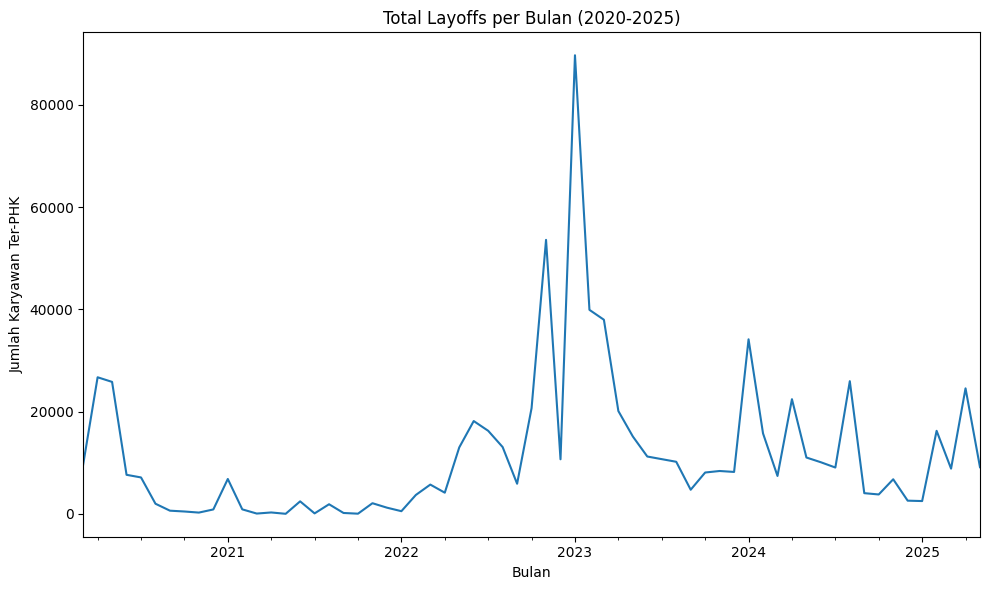

In [8]:

# --- Visualisasi 1: Tren total layoffs per bulan ---
layoffs_by_month = df.groupby('month')['total_laid_off'].sum().sort_index()
fig1 = plt.figure()
layoffs_by_month.plot()
plt.title('Total Layoffs per Bulan (2020-2025)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Karyawan Ter-PHK')
plt.tight_layout()
plt.show()


### Kaitan dengan Pendekatan Analisis Permintaan  
Grafik tren **total layoffs per bulan** terutama merepresentasikan *pendekatan **berdasarkan data*** karena kita langsung menelusuri pola musiman yang muncul dari data historis tanpa praduga spesifik. Temuan pola ini kemudian dapat menjadi dasar pendekatan lain.

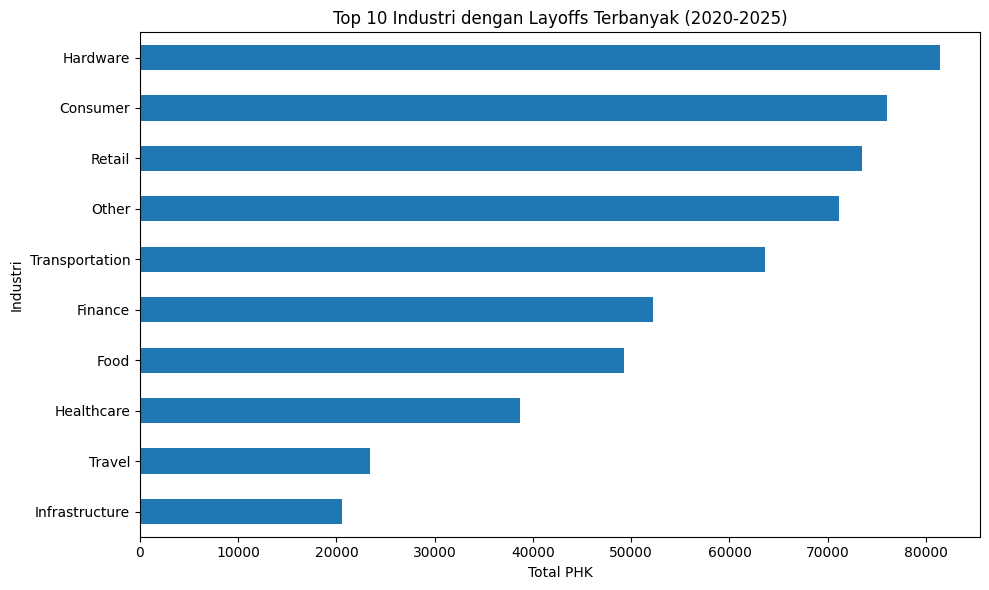

In [9]:

# --- Visualisasi 2: 10 Industri teratas berdasarkan total layoffs ---
top_industries = (df.groupby('industry')['total_laid_off']
                    .sum()
                    .nlargest(10)
                    .sort_values())
fig2 = plt.figure()
top_industries.plot(kind='barh')
plt.title('Top 10 Industri dengan Layoffs Terbanyak (2020-2025)')
plt.xlabel('Total PHK')
plt.ylabel('Industri')
plt.tight_layout()
plt.show()


### Kaitan dengan Pendekatan Analisis Permintaan  
Visualisasi **10 industri dengan PHK terbanyak** termasuk *pendekatan **berorientasi pada tujuan***—tujuannya menjawab pertanyaan manajemen: *“Industri mana yang paling terdampak dan perlu prioritas mitigasi?”* Hasilnya memandu perencanaan kapasitas dan strategi fokus.

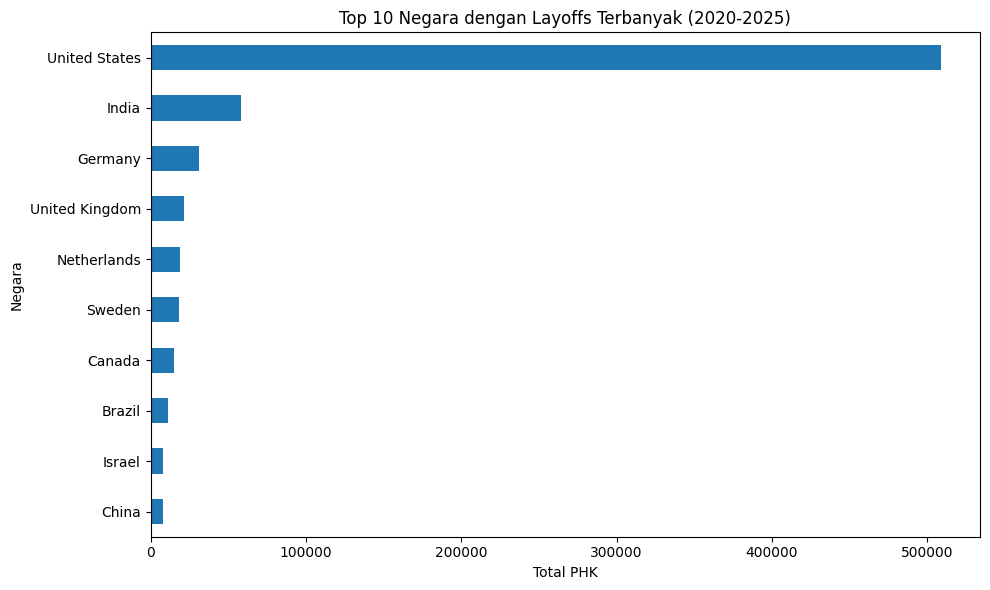

In [10]:

# --- Visualisasi 3: 10 Negara teratas berdasarkan total layoffs ---
top_countries = (df.groupby('country')['total_laid_off']
                   .sum()
                   .nlargest(10)
                   .sort_values())
fig3 = plt.figure()
top_countries.plot(kind='barh')
plt.title('Top 10 Negara dengan Layoffs Terbanyak (2020-2025)')
plt.xlabel('Total PHK')
plt.ylabel('Negara')
plt.tight_layout()
plt.show()


### Kaitan dengan Pendekatan Analisis Permintaan  
Diagram **10 negara teratas berdasarkan layoffs** mencerminkan *pendekatan **didorong secara eksternal***. Faktor‐faktor makro (kebijakan pemerintah, ekonomi global, kondisi pasar tenaga kerja) berada di luar kontrol perusahaan namun sangat memengaruhi besarnya PHK di tiap negara.

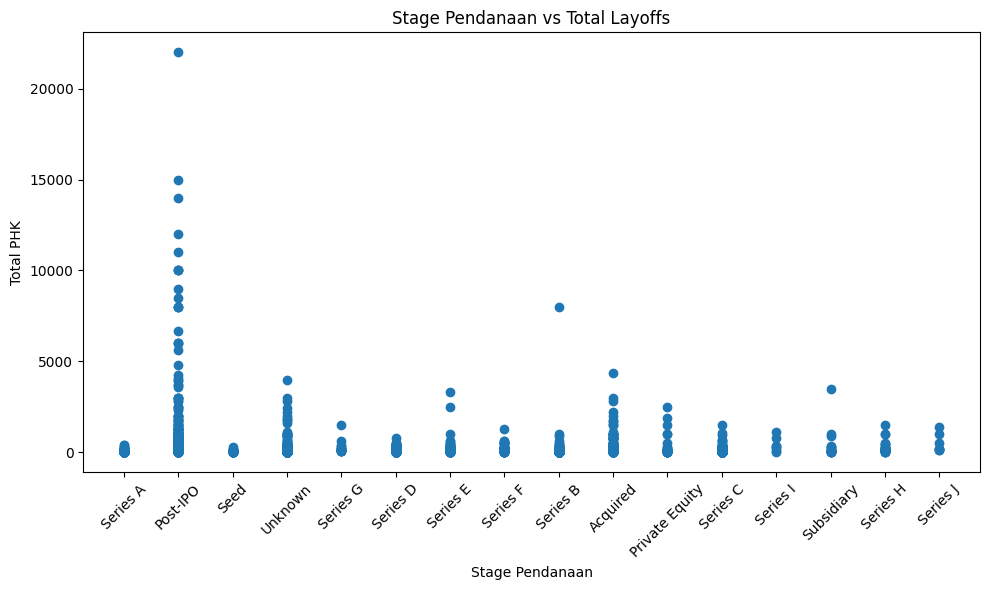

In [11]:

# --- Visualisasi 4: Hubungan Stage Pendanaan vs Total Layoffs ---
# Ambil data dengan nilai valid
stage_layoffs = df.dropna(subset=['stage', 'total_laid_off'])
fig4 = plt.figure()
plt.scatter(stage_layoffs['stage'], stage_layoffs['total_laid_off'])
plt.xticks(rotation=45)
plt.title('Stage Pendanaan vs Total Layoffs')
plt.xlabel('Stage Pendanaan')
plt.ylabel('Total PHK')
plt.tight_layout()
plt.show()


### Kaitan dengan Pendekatan Analisis Permintaan  
Scatter **stage pendanaan vs total layoffs** memakai *pendekatan **berbasis proses***—kita memetakan tahap siklus hidup startup (seed, Series A, dst.) ke outcome PHK untuk memahami di titik proses mana risiko tenaga kerja paling tinggi dan menyusun intervensi dini.